Data Sample:
   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg          

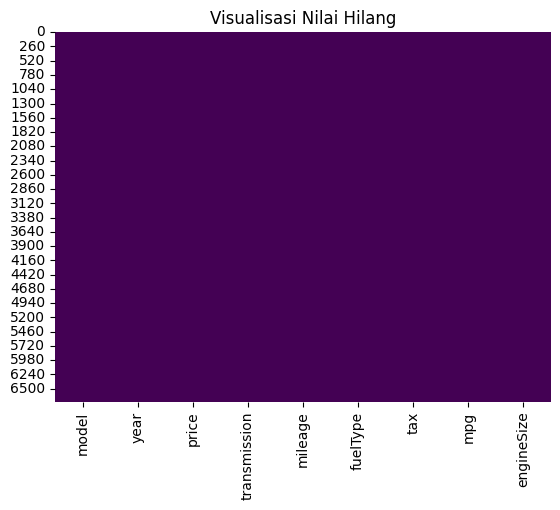

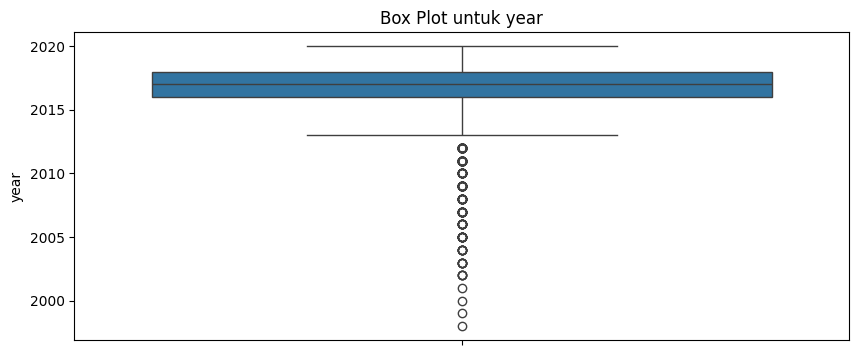

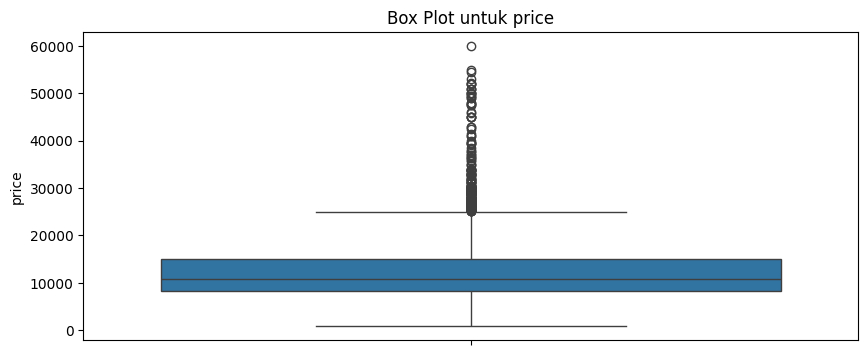

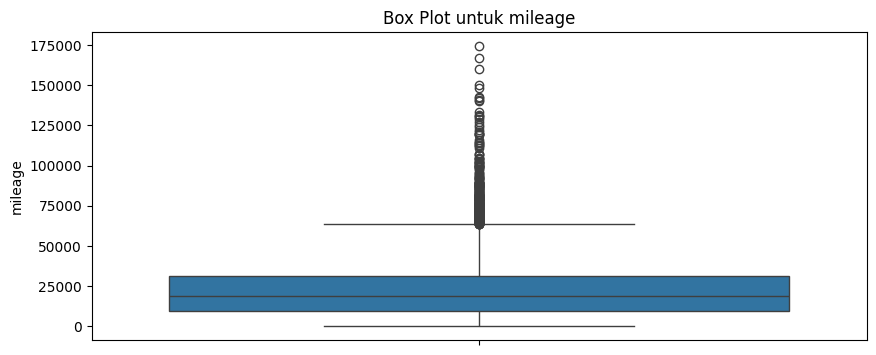

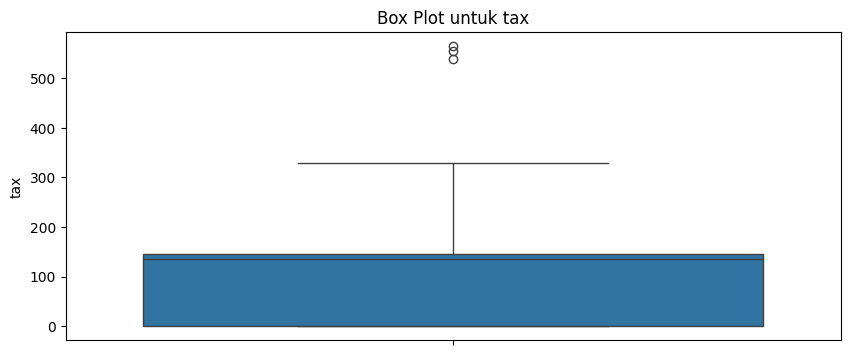

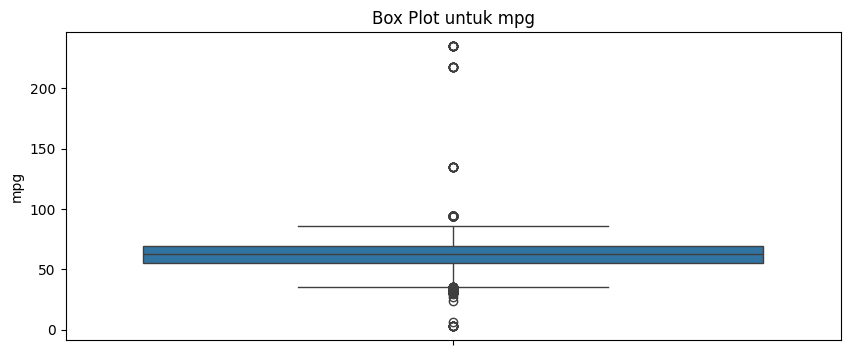

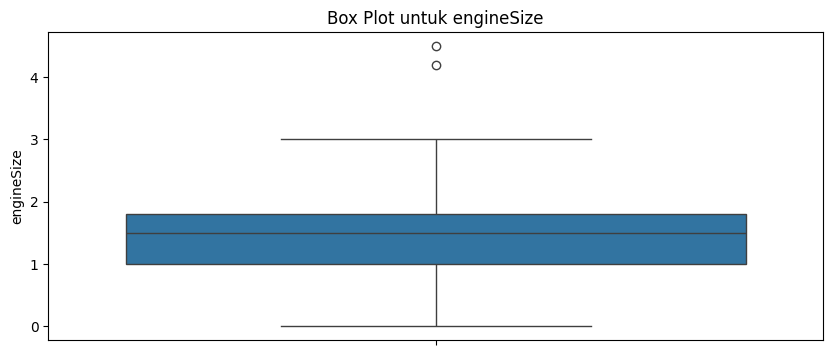

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
data = pd.read_csv('toyota.csv')

# Menampilkan beberapa baris pertama
print("Data Sample:")
print(data.head())

# Rangkuman dataset (jumlah baris, kolom, dan tipe data)
print("\nInformasi Dataset:")
print(data.info())

print("\nStatistik Deskriptif Dataset:")
print(data.describe())

# Mengecek nilai yang hilang
missing_values = data.isnull().sum()
print("\nNilai yang Hilang di Setiap Kolom:")
print(missing_values[missing_values > 0])

# Visualisasi nilai hilang
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisasi Nilai Hilang")
plt.show()

# Identifikasi pencilan (contoh: menggunakan box plot)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data[column])
    plt.title(f"Box Plot untuk {column}")
    plt.show()


Data Setelah Imputasi:
       year     price   mileage       tax       mpg  engineSize  \
0 -0.510105  0.681309  0.124485  2.319589 -2.141016    1.218883   
1  0.068334  0.680396 -0.210599  0.685958 -2.141016    1.218883   
2 -1.088544  0.315630  0.331387  2.319589 -2.141016    1.218883   
3  0.068334  1.228915 -0.448047  0.754026 -2.141016    1.218883   
4  0.068334  0.954929  0.870986  0.685958 -2.141016    1.218883   

   model_ Avensis  model_ Aygo  model_ C-HR  model_ Camry  ...  \
0           False        False        False         False  ...   
1           False        False        False         False  ...   
2           False        False        False         False  ...   
3           False        False        False         False  ...   
4           False        False        False         False  ...   

   model_ Urban Cruiser  model_ Verso  model_ Verso-S  model_ Yaris  \
0                 False         False           False         False   
1                 False         Fa

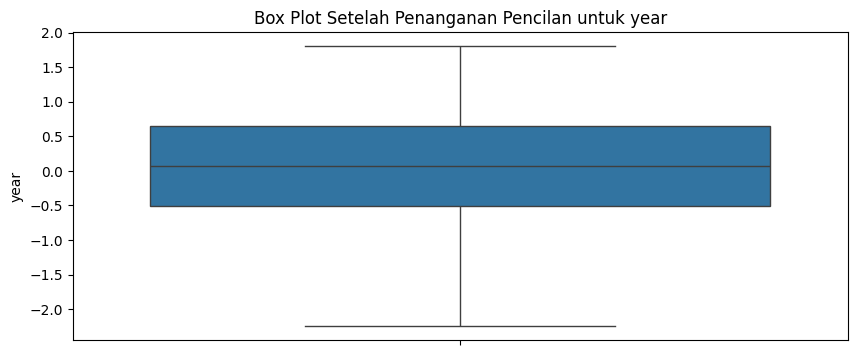

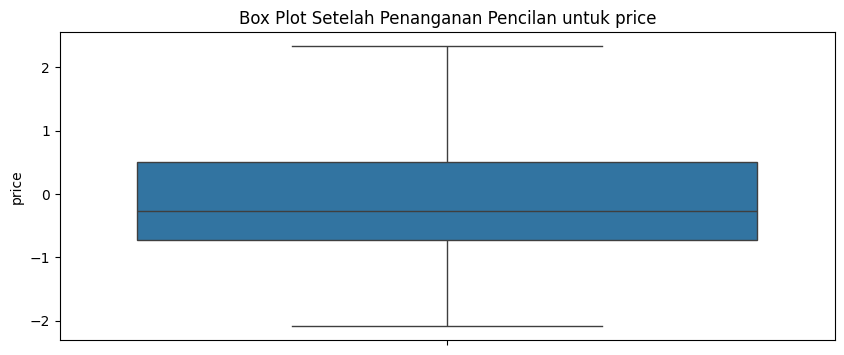

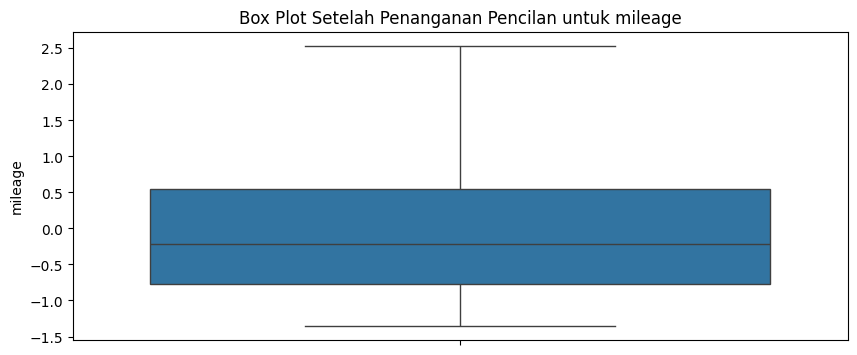

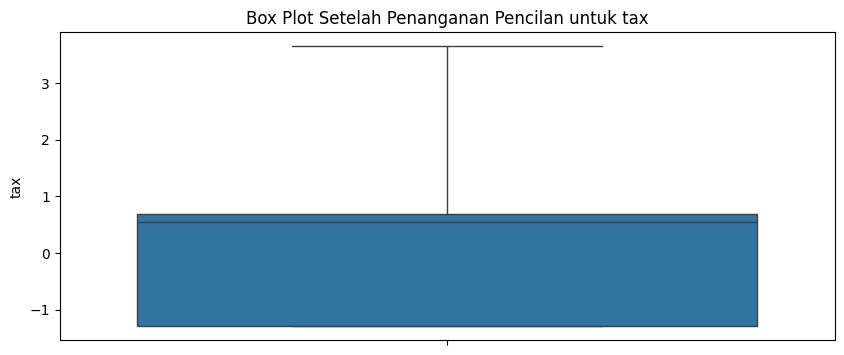

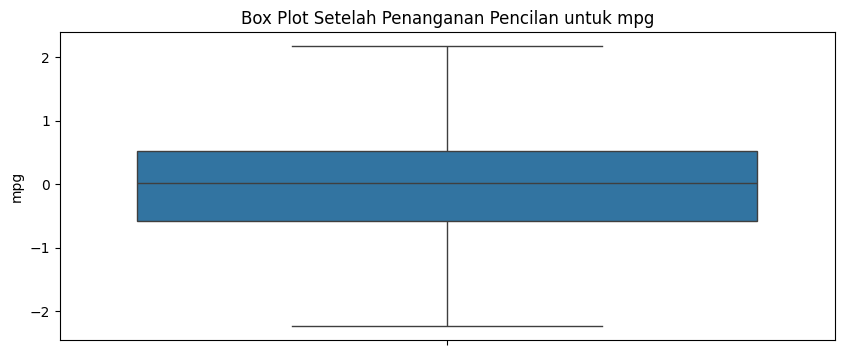

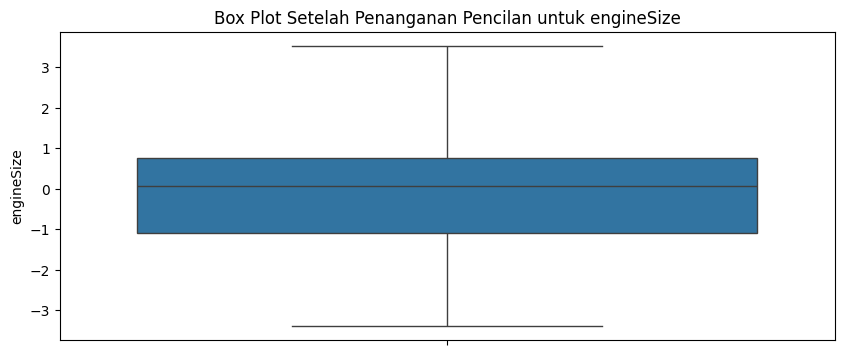


Data Setelah Penskalaan:
               year         price       mileage           tax           mpg  \
count  6.738000e+03  6.738000e+03  6.738000e+03  6.738000e+03  6.738000e+03   
mean  -3.501042e-16  2.446511e-16  2.952686e-17 -3.796310e-17 -8.436245e-17   
std    1.000074e+00  1.000074e+00  1.000074e+00  1.000074e+00  1.000074e+00   
min   -2.245422e+00 -2.085945e+00 -1.349969e+00 -1.288013e+00 -2.238366e+00   
25%   -5.101047e-01 -7.269769e-01 -7.718669e-01 -1.288013e+00 -5.834222e-01   
50%    6.833446e-02 -2.694210e-01 -2.168424e-01  5.498221e-01  1.690037e-02   
75%    6.467737e-01  4.977386e-01  5.514352e-01  6.859580e-01  5.198733e-01   
max    1.803652e+00  2.334812e+00  2.536389e+00  3.646915e+00  2.174817e+00   

        engineSize  
count  6738.000000  
mean      0.000000  
std       1.000074  
min      -3.388468  
25%      -1.084793  
50%       0.067045  
75%       0.758148  
max       3.522559  

Data Setelah One-Hot Encoding:
       year     price   mileage       tax

In [28]:
from sklearn.impute import SimpleImputer

# Menghapus baris dengan nilai yang hilang
data_dropped = data.dropna()

# Imputasi nilai hilang dengan rata-rata
imputer_mean = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer_mean.fit_transform(data[numerical_columns])

# Imputasi nilai hilang dengan median
imputer_median = SimpleImputer(strategy='median')
data[numerical_columns] = imputer_median.fit_transform(data[numerical_columns])

print("\nData Setelah Imputasi:")
print(data.head())

# Mengidentifikasi pencilan menggunakan IQR
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Visualisasi setelah menangani pencilan
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data[column])
    plt.title(f"Box Plot Setelah Penanganan Pencilan untuk {column}")
    plt.show()

    from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Penskalaan Min-Max
scaler_minmax = MinMaxScaler()
data[numerical_columns] = scaler_minmax.fit_transform(data[numerical_columns])

# Penskalaan Standar
scaler_standard = StandardScaler()
data[numerical_columns] = scaler_standard.fit_transform(data[numerical_columns])

print("\nData Setelah Penskalaan:")
print(data[numerical_columns].describe())

# Mengidentifikasi kolom kategorikal
categorical_columns = data.select_dtypes(include=['object']).columns

# One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("\nData Setelah One-Hot Encoding:")
print(data.head())

from sklearn.feature_selection import SelectKBest, f_classif

# Pastikan kolom 'target' ada di dataset. Ganti 'target' dengan nama kolom target yang sebenarnya.
if 'target' in data.columns:
    X = data.drop(columns=['target'])  # Fitur independen
    y = data['target']  # Kolom target

    # Pastikan target numerik atau sesuai dengan metode f_classif
    if y.dtype == 'object':
        y = pd.factorize(y)[0]  # Konversi target kategorikal menjadi numerik

    # Terapkan SelectKBest untuk memilih fitur terbaik
    selector = SelectKBest(score_func=f_classif, k=min(5, X.shape[1]))  # Memilih 5 fitur terbaik atau kurang jika kolom lebih sedikit
    X_new = selector.fit_transform(X, y)

    # Tampilkan fitur yang dipilih
    selected_features = X.columns[selector.get_support(indices=True)]
    print("\nFitur yang Dipilih:")
    print(selected_features)
else:
    print("Kolom 'target' tidak ditemukan di dataset. Pastikan nama kolom target sudah benar.")